# Proyek Analisis Data: Air Quality Tiantan
- **Nama:** Yohanes Ardian Dogma K
- **Email:** yohanesardiandk@gmail.com
- **ID Dicoding:** ardi93

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara di Tiantan dari tahun ke tahun?
- Apakah terdapat korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan TEMP, PRES, DEWP, RAIN, WSPM?

## Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
dir_name = "data"

## Data Wrangling

### Gathering Data

In [30]:
tiantan_df = pd.read_csv("./data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [31]:
# create a datetime column using the year,month,day and hour columns.
years = tiantan_df['year'].values
months = tiantan_df['month'].values
days = tiantan_df['day'].values
hours = tiantan_df['hour'].values
full_date = []

for i in range(tiantan_df.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
tiantan_df = pd.concat([dates,tiantan_df],axis=1)

tiantan_df.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


### Assessing Data

In [32]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34387 non-null  float64       
 7   PM10     34467 non-null  float64       
 8   SO2      33946 non-null  float64       
 9   NO2      34320 non-null  float64       
 10  CO       33938 non-null  float64       
 11  O3       34221 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34986 non-null  object        
 17  WSPM     35050 non-null  float6

Terdapat perbedaan pada jumlah data pada beberapa kolom. Hal ini menunjukkan adanya missing values pada kolom tersebut.

In [33]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom
tiantan_df.isna().sum()

date          0
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Terdapat banyak missing values pada beberapa kolom. Perlu dilakukan tahap data cleaning.

In [34]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
# Menampilkan ringkasan parameter statistik 
tiantan_df.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


### Cleaning Data

In [36]:
# Menggunakan Data Rata-Rata (MEAN) untuk mengisi cell kosong
tiantan_df['PM2.5'] = tiantan_df['PM2.5'].fillna(value=82.164911)
tiantan_df['PM10'] = tiantan_df['PM10'].fillna(value=106.363672)
tiantan_df['SO2'] = tiantan_df['SO2'].fillna(value=14.367615)
tiantan_df['NO2'] = tiantan_df['NO2'].fillna(value=53.162646)
tiantan_df['CO'] = tiantan_df['CO'].fillna(value=1298.303318)
tiantan_df['O3'] = tiantan_df['O3'].fillna(value=55.984297)
tiantan_df['TEMP'] = tiantan_df['TEMP'].fillna(value=13.671490)
tiantan_df['PRES'] = tiantan_df['PRES'].fillna(value=1012.547419)
tiantan_df['DEWP'] = tiantan_df['DEWP'].fillna(value=-2.447535)
tiantan_df['RAIN'] = tiantan_df['RAIN'].fillna(value=0.064020)
tiantan_df['WSPM'] = tiantan_df['WSPM'].fillna(value=1.860785)
# Menggunakan Data Teratas (TOP) untuk mengisi cell kosong
tiantan_df['wd'] = tiantan_df['wd'].fillna(value="ENE")

In [37]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom 
tiantan_df.isna().sum()

date       0
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [38]:
# Menampilkan data rata-rata pada tahun
tiantan_df.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,83.197686,108.253070,18.183159,53.324068,1315.328358,54.440069,15.963657,1009.828758,5.152369,0.057979,1.803813
2014,11724.5,6.526027,15.720548,11.5,86.433097,114.227998,19.094873,55.616533,1314.141234,56.976616,13.881153,1012.534224,2.604429,0.054212,1.820046
2015,20484.5,6.526027,15.720548,11.5,82.600319,103.048920,11.883537,51.934627,1300.419445,60.070583,13.432386,1012.789625,2.691154,0.072880,1.934751
2016,29256.5,6.513661,15.756831,11.5,74.035380,97.231196,8.996355,50.083009,1199.436747,55.425489,13.863387,1012.824316,2.283193,0.079753,1.859347
2017,34356.5,1.474576,15.288136,11.5,98.140631,125.071071,14.021248,63.845862,1712.240207,36.041356,0.775014,1023.513139,-13.108349,0.003605,1.959623


In [39]:
# Menampilkan data rata-rata pada bulan
tiantan_df.groupby("month").mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,98.300374,119.430200,27.190813,67.953975,1895.806538,26.219658,-1.719811,1024.026855,-14.570286,0.000594,1.917838
2,21612.287611,2015.504425,14.628319,11.5,87.166134,104.936244,23.779356,53.433646,1368.965825,42.944075,1.216896,1022.169499,-13.082982,0.011897,2.095487
3,13518.500000,2014.500000,16.000000,11.5,94.347069,127.210118,26.396561,60.367685,1347.168180,52.677062,8.439468,1015.861229,-7.993952,0.007661,2.076613
4,14250.500000,2014.500000,15.500000,11.5,71.114142,109.540572,14.409298,46.741200,895.090125,72.175553,15.439931,1010.158681,0.164028,0.025625,2.346667
5,14982.500000,2014.500000,16.000000,11.5,62.615592,108.037632,15.195056,41.888761,882.857256,92.110831,21.709039,1004.202688,6.716499,0.045094,2.283132
6,15714.500000,2014.500000,15.500000,11.5,74.311318,94.756067,9.318794,41.995279,1108.686473,90.901884,24.700243,1001.104132,15.532882,0.129028,1.721632
7,16446.500000,2014.500000,16.000000,11.5,74.518127,88.104992,6.046145,38.565570,997.437404,91.373280,27.438340,999.877050,19.801411,0.262466,1.644086
8,17190.500000,2014.500000,16.000000,11.5,57.233866,72.224521,5.276538,39.496669,908.524079,84.923854,26.916801,1002.975168,18.908636,0.087870,1.579839
9,17922.500000,2014.500000,15.500000,11.5,63.920915,80.837280,7.092519,50.980691,1041.512834,52.171217,20.996472,1010.481226,13.896378,0.132169,1.513231


In [40]:
# Menampilkan data rata-rata pada hari tanggal
tiantan_df.groupby("day").mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17198.500000,2014.666667,6.500000,11.5,88.542078,111.728615,12.763146,52.208040,1334.312089,53.691514,13.501736,1011.940625,2.664757,0.140017,1.870920
2,17222.500000,2014.666667,6.500000,11.5,77.189656,96.262713,14.093226,53.908714,1303.968516,51.710408,13.560206,1011.211545,2.260330,0.085243,1.822309
3,17246.500000,2014.666667,6.500000,11.5,86.715223,113.956156,15.505590,54.457925,1417.389160,57.338542,14.056076,1011.217361,1.806684,0.000955,1.964410
4,17270.500000,2014.666667,6.500000,11.5,93.992133,118.757269,13.707171,55.651502,1484.468182,57.202927,13.610301,1011.521788,2.336719,0.081510,1.904340
5,17294.500000,2014.666667,6.500000,11.5,77.611370,101.497554,13.484821,49.543058,1271.393023,61.377848,13.889323,1012.653501,2.414410,0.037587,1.942448
6,17318.500000,2014.666667,6.500000,11.5,88.497655,106.327573,16.004254,52.349710,1381.369771,59.430704,13.458030,1013.310460,2.216319,0.065451,1.750521
7,17342.500000,2014.666667,6.500000,11.5,86.926760,104.131314,14.883986,51.270185,1397.080182,58.513086,13.539612,1013.136169,2.971441,0.125868,1.809115
8,17366.500000,2014.666667,6.500000,11.5,83.620316,105.014315,15.777681,49.922302,1254.363617,58.047063,13.314980,1013.256163,1.829253,0.046007,1.978385
9,17390.500000,2014.666667,6.500000,11.5,71.699178,96.820076,12.735814,50.911871,1136.324817,53.607707,12.743490,1013.629138,1.509896,0.034115,1.999219


In [41]:
# Menampilkan data rata-rata pada jam
tiantan_df.groupby("hour").mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,88.909637,114.904175,11.780562,58.648751,1425.825053,37.605304,11.609709,1012.964292,3.176833,0.080126,1.503217
1,17522.0,2014.66256,6.52293,15.729637,88.548623,112.852468,11.922310,57.359647,1416.378991,34.568525,11.148593,1012.911225,3.289185,0.062081,1.445243
2,17523.0,2014.66256,6.52293,15.729637,88.091066,108.648150,10.875258,55.255807,1403.154179,32.019852,10.667154,1012.852578,3.263929,0.082615,1.390486
3,17524.0,2014.66256,6.52293,15.729637,86.821354,105.147023,10.726887,53.989855,1364.951799,30.781072,10.231964,1012.768924,3.197298,0.108668,1.342752
4,17525.0,2014.66256,6.52293,15.729637,84.417388,101.549456,10.477146,52.696642,1370.443892,28.277221,9.879679,1012.750238,3.075737,0.088066,1.310309
5,17526.0,2014.66256,6.52293,15.729637,81.732271,97.331106,10.017246,50.833437,1353.458765,25.290216,9.626708,1012.923818,2.973000,0.057333,1.327215
6,17527.0,2014.66256,6.52293,15.729637,79.209318,96.395825,10.096679,51.416599,1352.111843,23.245087,9.825506,1013.180115,2.938297,0.041864,1.388680
7,17528.0,2014.66256,6.52293,15.729637,77.785262,97.151509,10.684511,55.030580,1382.350743,21.887834,10.681010,1013.504799,2.852775,0.029930,1.528694
8,17529.0,2014.66256,6.52293,15.729637,79.176217,102.271521,12.736577,60.064066,1431.959461,24.031508,11.969425,1013.829634,2.673652,0.035269,1.682683


In [42]:
#menghitung korelasi antar feature dalam sebuah DataFrame
tiantan_df.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.016739,-0.034361,-0.242411,-0.001729,0.014531,-0.050981,-0.119018,0.172835,-0.089091,0.008390,-0.003582
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.023800,-0.033748,-0.177984,-0.015839,-0.001788,-0.019674,-0.148766,0.173583,-0.152011,0.004368,0.027649
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.029150,-0.002326,-0.245095,0.055898,0.065218,-0.123483,0.132503,-0.021161,0.265398,0.016542,-0.126871
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.007583,0.027003,-0.005835,0.013571,-0.005388,0.004332,0.015847,0.018163,0.019887,-0.006630,-0.009685
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.008886,0.030735,0.056655,-0.033307,-0.051812,0.291444,0.142074,-0.039070,-0.019929,0.005098,0.156576
PM2.5,-0.016739,-2.380018e-02,2.915039e-02,7.583323e-03,-8.885921e-03,1.000000,0.889791,0.392483,0.654249,0.786023,-0.165975,-0.150038,0.007196,0.111245,-0.014904,-0.287640
PM10,-0.034361,-3.374771e-02,-2.325534e-03,2.700285e-02,3.073529e-02,0.889791,1.000000,0.387506,0.617446,0.706908,-0.116944,-0.118927,-0.022081,0.058498,-0.027644,-0.178408
SO2,-0.242411,-1.779839e-01,-2.450946e-01,-5.835097e-03,5.665457e-02,0.392483,0.387506,1.000000,0.406193,0.398966,-0.047650,-0.219087,0.151274,-0.218145,-0.038158,-0.038441
NO2,-0.001729,-1.583949e-02,5.589827e-02,1.357144e-02,-3.330653e-02,0.654249,0.617446,0.406193,1.000000,0.700122,-0.535742,-0.316918,0.180636,-0.078925,-0.047178,-0.407930
CO,0.014531,-1.787669e-03,6.521764e-02,-5.388444e-03,-5.181194e-02,0.786023,0.706908,0.398966,0.700122,1.000000,-0.313718,-0.313296,0.148633,-0.034384,-0.013439,-0.321367


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara di Tiandi dari tahun ke tahun?

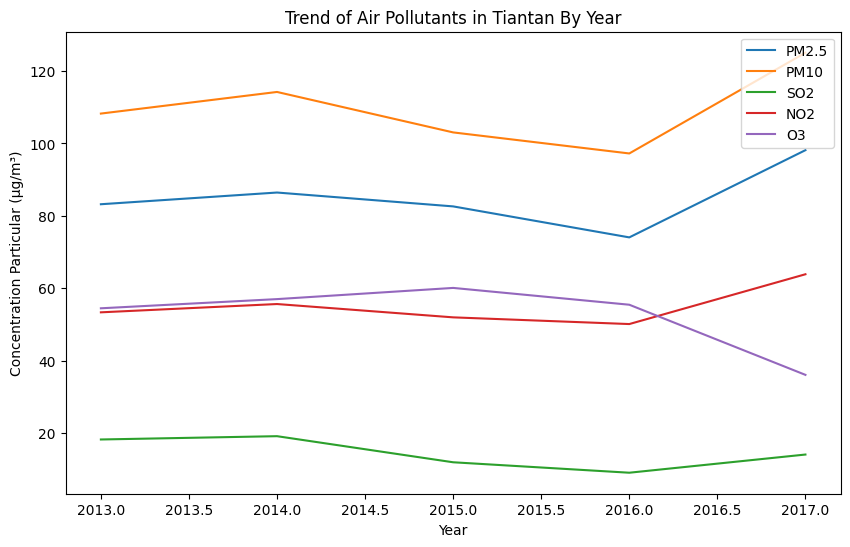

In [43]:
groupByYear = tiantan_df.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["PM2.5"], label="PM2.5")
plt.plot(groupByYear.index, groupByYear["PM10"], label="PM10")
plt.plot(groupByYear.index, groupByYear["SO2"], label="SO2")
plt.plot(groupByYear.index, groupByYear["NO2"], label="NO2")
plt.plot(groupByYear.index, groupByYear["O3"], label="O3")
plt.xlabel("Year")
plt.ylabel("Concentration Particular (µg/m³)")
plt.title("Trend of Air Pollutants in Tiantan By Year")
plt.legend()
plt.show()

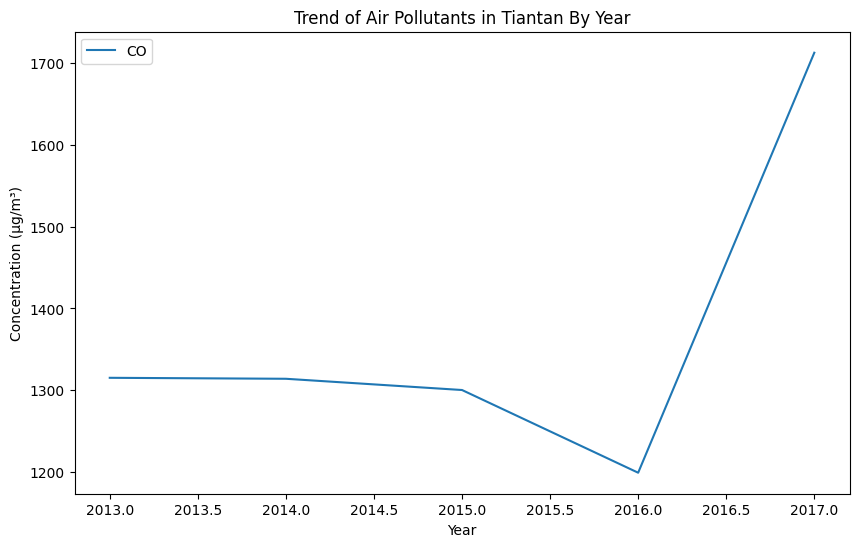

In [44]:
## Because concentration CO is to high we seperate the chart

groupByYear = tiantan_df.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
plt.xlabel("Year")
plt.ylabel("Concentration (µg/m³)")
plt.title("Trend of Air Pollutants in Tiantan By Year")
plt.legend()
plt.show()

### Pertanyaan 2: Apakah terdapat korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan TEMP, PRES, DEWP, RAIN, WSPM?

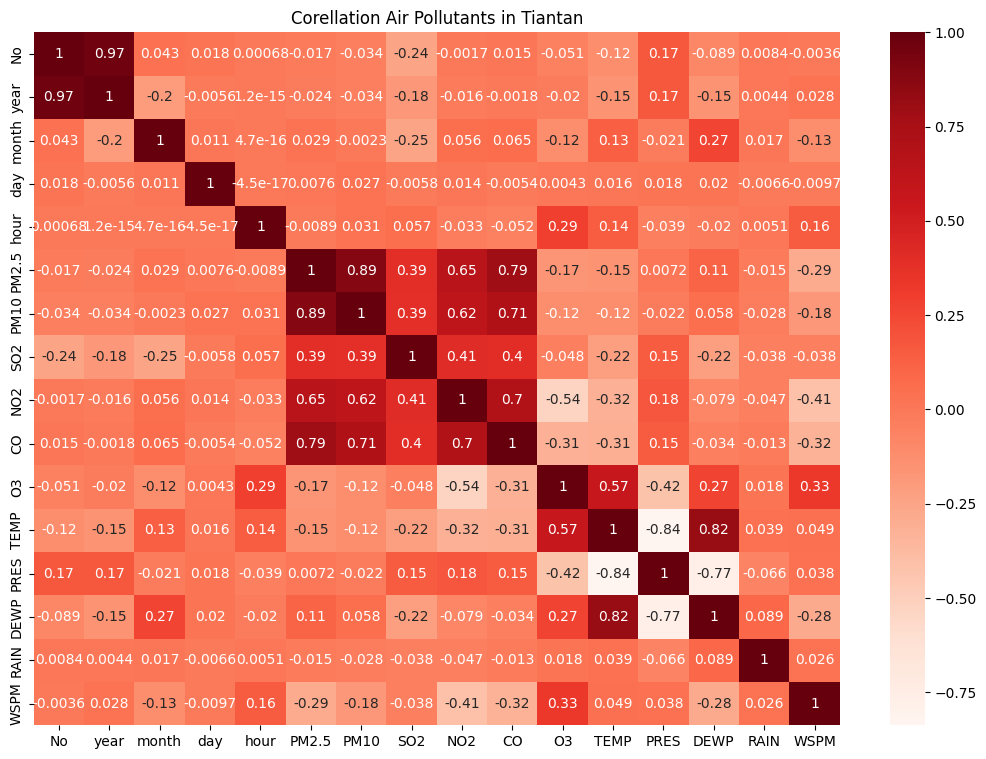

In [45]:
plt.figure(figsize=(13,9))

sns.heatmap(tiantan_df.corr(numeric_only = True),cmap=plt.cm.Reds,annot=True)
plt.title("Corellation Air Pollutants in Tiantan")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Polusi udara PM2.5 dan PM10 mengalami kenaikan, hal tersebut membuktikan udara tidak sehat.
- Conclution pertanyaan 2 :  Korelasi ini bersifat positif atau negatif, artinya konsentrasi polutan udara dapat meningkat atau menurun seiring dengan perubahan variabel meteorologi.

In [47]:
tiantan_df.to_csv("all_data.csv", index=False)